# Rossman Pharmacueticals Sales

## Data Preprocessing
This notebook presents the code for preprocessing the rossman sales data. The goal is to process the data into a format that can be fed into a machine learning model. I will convert non-numeric columns to numeric, impute missing values and generate new feature from existing features. For the datetime columns, I will extract weekdays, weekends, month period (begining, mid-month, end-month). I will also scale the data. Scaling is necessary especially when using machine learning algorithmns that use Euclidean distances. I will use the sklearn standard scaler for this.

### Load Required modules and libraries

In [1]:
#standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import pandas as pd

#custom-made libraries
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData #for loading the dataset from source files
from preprocess import Preprocess #for data preprocessing
from plot import Plot #plotting and visualization

### Load the train data

#### Initialize the load, preprocess and plot classes

In [2]:
loader = LoadData()
preprocessor = Preprocess()
plot = Plot()

#### Load the raw train dataset and store information dataset

In [3]:
train_df = loader.read_csv('../data/raw/train/train.csv') #contains sales information for trainig the model
store_df = loader.read_csv('../data/raw/store.csv') #contains stores information

C:\Users\wakur\OneDrive\Documents\GitHub\Pharmaceutical-Sales-prediction\scripts\load_data.py:66: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file)


In [4]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Merge the train dataset with the stores info

In [6]:
train_df=preprocessor.join_dataframes(train_df, store_df, 'Store')
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Transformation

##### Convert the **Date** column to datetime

In [7]:
train_df=preprocessor.convert_to_datetime(train_df, 'Date')

##### Transform the StateHoliday column

In [8]:
train_df = preprocessor.tranform_StateHoliday(train_df)

C:\Users\wakur\OneDrive\Documents\GitHub\Pharmaceutical-Sales-prediction\scripts\preprocess.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['StateHoliday'].loc[new_df['StateHoliday'] == 0] = '0'


##### Extract new Features
I will extract Year, Month, Day, Day of the week, week of the year, weekend and weekday information from the Date column

In [9]:
train_df = preprocessor.extract_fields_date(train_df, 'Date')
train_df.head()

C:\Users\wakur\OneDrive\Documents\GitHub\Pharmaceutical-Sales-prediction\scripts\preprocess.py:146: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,4,31,0
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,30,3,31,0
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,29,2,31,0
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,28,1,31,0
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,27,0,31,1


##### Set the **Date** column as the index of df

In [10]:
train_df.set_index('Date', inplace=True)

### Imputing missing values

In [11]:
#Get missing values information
preprocessor.get_missing_data_percentage(train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


I have to handle the missing values in a sensible way

In [12]:
# create a new df with only columns that contain missing values
missing_df = train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head()

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
Date,,,,,,,
2015-07-31,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-30,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-29,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-28,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-27,NaN,NaN,NaN,9.0,2008.0,1270.0,1


Fill missing values in **Promo2SinceYear, Promo2SinceWeek, CompetitionOpenSinceMonth, CompetitonOpenSinceYear, and CompetitionDistance** with median values

In [13]:
missing_mean = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_df = preprocessor.fill_missing_median(train_df, missing_mean)

Fill **Open** with 0

In [14]:
train_df = preprocessor.fill_missing_with_zero(train_df, ['Open'])

Fill **PromoInterval** with mode values

In [15]:
train_df = preprocessor.fill_missing_mode(train_df, ['PromoInterval'])

#Check for any missing values in the dataset
preprocessor.get_missing_data_percentage(train_df)

,Total,%
Store,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


### Imputing Outliers

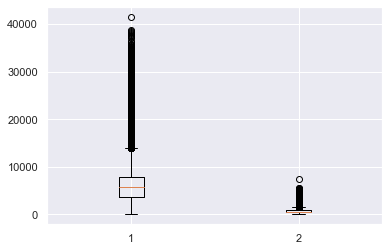

In [16]:
# check for outliers in [Sales and customers]
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [17]:
# Impute outliers using IQR
train_df = preprocessor.replace_outliers_iqr(train_df, ['Sales', 'Customers'])

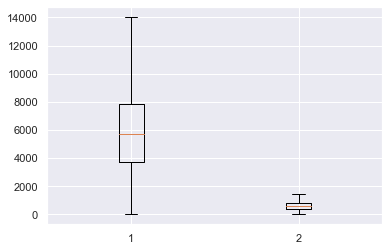

In [18]:
# check if outliers have been imputed properly
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

### Label Encode Categorical Variables

In [19]:
#Select categorical columns
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType', 'StateHoliday']

#Label encode the categorical column. Forms a new df
label_encoded_df = preprocessor.label_encode(train_df, categorical_columns)

#Drop categorical columns from the original df
train_df.drop(categorical_columns, axis=1, inplace=True)

#Concatenate the label encoded columns on to the original dataframe
train_df.reset_index(drop=True, inplace=True)
train_df = pd.concat([train_df, label_encoded_df], axis=1)
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType,StateHoliday
0,1,4,5263.0,555.0,1,1,1,1270.0,9.0,2008.0,...,2015,7,31,4,31,0,1,0,2,0
1,1,3,5020.0,546.0,1,1,1,1270.0,9.0,2008.0,...,2015,7,30,3,31,0,1,0,2,0
2,1,2,4782.0,523.0,1,1,1,1270.0,9.0,2008.0,...,2015,7,29,2,31,0,1,0,2,0
3,1,1,5011.0,560.0,1,1,1,1270.0,9.0,2008.0,...,2015,7,28,1,31,0,1,0,2,0
4,1,0,6102.0,612.0,1,1,1,1270.0,9.0,2008.0,...,2015,7,27,0,31,1,1,0,2,0


In [20]:
train_df.columns


Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'weekday', 'weekofyear',
       'weekend', 'PromoInterval', 'Assortment', 'StoreType', 'StateHoliday'],
      dtype='object')

In [21]:
# confirm the data types of the columns in the df
train_df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                        float64
Customers                    float64
Open                           int64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Year                           int64
Month                          int64
Day                            int64
weekday                        int64
weekofyear                     int64
weekend                        int64
PromoInterval                  int32
Assortment                     int32
StoreType                      int32
StateHoliday                   int32
dtype: object

### Sorting the data
Sort the data based on the Store and the date information

In [22]:
train_df.sort_values(['Store'], ignore_index=True, inplace=True)
train_df.sort_values(['Year', 'Month', 'Day'], ascending=False, ignore_index=True, inplace=True)

### Correlation
Check the correlation of different features to the target (**Sales**)

In [23]:
corr_matrix = train_df.corr()
corr_matrix['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.920805
Open                         0.715977
Promo                        0.468557
SchoolHoliday                0.088484
Assortment                   0.074635
weekofyear                   0.050223
Month                        0.045805
Promo2SinceWeek              0.033582
Year                         0.025718
CompetitionOpenSinceYear     0.008260
Store                        0.003404
Promo2SinceYear             -0.004713
PromoInterval               -0.004929
StoreType                   -0.004961
Day                         -0.011411
CompetitionDistance         -0.012095
CompetitionOpenSinceMonth   -0.020931
Promo2                      -0.084233
StateHoliday                -0.242635
weekend                     -0.279645
DayOfWeek                   -0.481886
weekday                     -0.481886
Name: Sales, dtype: float64

In [24]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\wakur\AppData\Local\Temp\ipykernel_14160\3601732716.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType,StateHoliday
Store,1.00,-0.00,0.00,0.02,-0.00,0.00,0.00,-0.03,-0.04,-0.00,0.01,0.01,0.03,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,-0.02,0.00
DayOfWeek,-0.00,1.00,-0.48,-0.45,-0.53,-0.39,-0.21,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,0.01,1.00,-0.00,0.29,-0.00,-0.00,0.00,-0.04
Sales,0.00,-0.48,1.00,0.92,0.72,0.47,0.09,-0.01,-0.02,0.01,-0.08,0.03,-0.00,0.03,0.05,-0.01,-0.48,0.05,-0.28,-0.00,0.07,-0.00,-0.24
Customers,0.02,-0.45,0.92,1.00,0.71,0.36,0.08,-0.09,-0.02,0.01,-0.15,0.01,0.03,-0.00,0.04,-0.00,-0.45,0.04,-0.29,0.00,0.00,-0.14,-0.24
Open,-0.00,-0.53,0.72,0.71,1.00,0.30,0.09,0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,-0.00,0.03,-0.53,0.00,-0.40,0.00,0.00,-0.00,-0.34
Promo,0.00,-0.39,0.47,0.36,0.30,1.00,0.07,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.02,-0.01,-0.11,-0.39,0.00,-0.36,0.00,0.00,-0.00,-0.02
SchoolHoliday,0.00,-0.21,0.09,0.08,0.09,0.07,1.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.04,0.10,0.03,-0.21,0.07,-0.20,-0.00,-0.00,0.00,0.20
CompetitionDistance,-0.03,-0.00,-0.01,-0.09,0.01,0.00,-0.00,1.00,-0.05,0.02,-0.14,-0.04,-0.04,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.15,0.08,-0.00
CompetitionOpenSinceMonth,-0.04,0.00,-0.02,-0.02,0.00,-0.00,-0.00,-0.05,1.00,-0.04,0.01,-0.01,0.02,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,0.02,0.03,0.00
CompetitionOpenSinceYear,-0.00,-0.00,0.01,0.01,0.00,0.00,0.00,0.02,-0.04,1.00,-0.05,-0.04,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.06,0.03,-0.00


### Drop unwanted Features
Drop **Customers** since its not in the test dataset

In [25]:
train_df.drop('Customers', axis=1, inplace=True)

In [26]:
train_df.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType,StateHoliday
0,1,4,5263.0,1,1,1,1270.0,9.0,2008.0,0,...,2015,7,31,4,31,0,1,0,2,0
1,2,4,6064.0,1,1,1,570.0,11.0,2007.0,1,...,2015,7,31,4,31,0,1,0,0,0
2,3,4,8314.0,1,1,1,14130.0,12.0,2006.0,1,...,2015,7,31,4,31,0,1,0,0,0
3,4,4,13995.0,1,1,1,620.0,9.0,2009.0,0,...,2015,7,31,4,31,0,1,2,2,0
4,5,4,4822.0,1,1,1,29910.0,4.0,2015.0,0,...,2015,7,31,4,31,0,1,0,0,0


### Saving the preprocessed data

In [27]:
train_df.to_csv('../data/processed/train.csv')

### Modelling
Since this project involves a regression problem, I will use tree based algorithms for modeling. I will use Random Forest Regressor and a Linear Regression model

#### a. Linear Regression Model

###### Import the necessary modules for linear regression model